In [1]:
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import plotly.graph_objects as go

In [2]:
# method 1 : use beauty module

from beauty import Beauty
beauty = Beauty('http://pc-tbed-bst-03:8080')
#beauty = Beauty('https://vm-atlas-tdaq-cc.cern.ch/tbed/pbeast/api/')  //P1 online data

In [3]:
run_num = 479269

In [4]:
csv_path = '/eos/home-i03/m/mdtoffline/mdt_dcs_offline/run_files/'

run_num_list = pd.read_csv(csv_path + 'run_numbs_start_end.csv')  # load existing csv

In [5]:
ts_start_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_start'].values[0]
ts_end_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_end'].values[0]

fmt = '%Y-%m-%d %H:%M:%S'

since_dt = dt.strptime(ts_start_dt, fmt) - timedelta(minutes=10)
till_dt = dt.strptime(ts_end_dt, fmt) + timedelta(minutes=10)
print(since_dt)
print(till_dt)

2024-06-30 04:22:00
2024-06-30 19:27:42


In [6]:
# since = dt(2024, 4, 18, 18, 20, 0) # Scan for a stable beam run
# till = dt(2024, 4, 19, 8, 20, 0)
# since

In [7]:
lbn = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSDDC:daqLumiBlockNumber.value',None, False)[0]
lbn

2024-06-30 04:12:31.503000+02:00      34.0
2024-06-30 04:22:57.788001+02:00      34.0
2024-06-30 04:30:57.905000+02:00       0.0
2024-06-30 04:32:00.107000+02:00       1.0
2024-06-30 04:33:00.218000+02:00       2.0
                                     ...  
2024-06-30 19:14:12.597000+02:00    1082.0
2024-06-30 19:15:12.600000+02:00    1083.0
2024-06-30 19:16:12.710000+02:00    1084.0
2024-06-30 19:17:12.717000+02:00    1085.0
2024-06-30 19:22:52.997000+02:00    1085.0
Name: ATLGCSDDC:daqLumiBlockNumber.value, Length: 1089, dtype: float64

In [8]:
# test stable beam flag
sbFlag = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSLHC:bit_lhc_RunCtrl_SafeBeam_StableBeams.value',None, False)[0]
sb_start_dt = sbFlag.index[0].replace(tzinfo=None)
sb_end_dt = sbFlag.index[1].replace(tzinfo=None)
sbFlag

2024-06-30 04:28:25.043000+02:00    1.0
2024-06-30 19:12:10.371000+02:00    0.0
Name: ATLGCSLHC:bit_lhc_RunCtrl_SafeBeam_StableBeams.value, dtype: float64

In [9]:
r4pFlag = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSLHC:ATLAS.Ready4Physics',None, False)[0]
r4p_start_dt = r4pFlag.index[0].replace(tzinfo=None)
r4p_end_dt = r4pFlag.index[1].replace(tzinfo=None)
r4pFlag

2024-06-30 04:56:08.697000+02:00    1.0
2024-06-30 19:11:24.610000+02:00    0.0
Name: ATLGCSLHC:ATLAS.Ready4Physics, dtype: float64

In [10]:
rlinfo_arr = []

for lbi, lb in zip(lbn.index, lbn.values):

    lbi = lbi.replace(tzinfo=None)
    sb = 0
    r4p = 0
    
    if sb_start_dt < lbi < sb_end_dt:
        sb = 1
    if r4p_start_dt < lbi < r4p_end_dt:
        r4p = 1
    rlinfo = ({ 'LumiBlock': int(lb),'AtlasPhysics': r4p, 'StableBeams': sb, 'ts': lbi})
    rlinfo_arr.append(rlinfo)

rlinfo_df = pd.DataFrame(rlinfo_arr)
rlinfo_df

LumiBlock  AtlasPhysics  StableBeams                         ts
0            34             0            0 2024-06-30 04:12:31.503000
1            34             0            0 2024-06-30 04:22:57.788001
2             0             0            1 2024-06-30 04:30:57.905000
3             1             0            1 2024-06-30 04:32:00.107000
4             2             0            1 2024-06-30 04:33:00.218000
...         ...           ...          ...                        ...
1084       1082             0            0 2024-06-30 19:14:12.597000
1085       1083             0            0 2024-06-30 19:15:12.600000
1086       1084             0            0 2024-06-30 19:16:12.710000
1087       1085             0            0 2024-06-30 19:17:12.717000
1088       1085             0            0 2024-06-30 19:22:52.997000

[1089 rows x 4 columns]

In [11]:
# since_dt = sbFlag.index[0].to_pydatetime().replace(tzinfo=None)  # Set start and end times for stable beam run
# till_dt = sbFlag.index[1].to_pydatetime().replace(tzinfo=None)
# since_dt

In [12]:
hltmon = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSMDT', 'value-number', 'ATLMDTPS2:CAEN/PSMDT02/branchController00/easyCrate0/easyBoard01/channel001.actual.iMon', None, False)[0]
lumi = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_CalibLumi.value', None, False)[0]
mu = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_Mu.value', None, False)[0]

In [13]:
hv_lumi = hltmon.correlate(lumi)
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(8,8), dpi=125)
hv_lumi.plot(marker='.',linestyle='None',color='blue',alpha = .25)
plt.xlabel('Lumi')
plt.ylabel(r'iMon ($\mu A$)')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Lumi vs I')
plt.show()

In [14]:
hv_lumi.values

array([1.23618548, 1.27139345, 1.29028005, 1.2981834 , 2.65748933,
       2.92122435, 3.05276247, 3.18452239, 3.31627791, 3.44781823,
       3.84331316, 4.10705258, 4.23902989, 4.37079639, 4.40413002,
       4.40947446, 4.41478328, 4.4201007 , 4.43075405, 4.44138028,
       4.44669814, 4.45202451, 4.47329514, 4.46266873, 4.47863932,
       4.48395674, 4.49460096, 4.49992759, 4.52627545, 4.54986679,
       4.57085558, 4.58408325, 4.62381169, 4.61056131, 4.63703958,
       4.65028952, 4.67674531, 4.6958898 , 4.68267329, 4.65914103,
       4.64595737, 4.63276272, 4.61956807, 4.60636255, 4.60157445,
       4.65191413, 4.75225067, 4.79968005, 4.79303273, 4.77312539,
       4.75983152, 4.7531957 , 4.74654916, 4.7332773 , 4.7133589 ,
       4.70072904, 4.79429447, 4.88957253, 4.87805919, 4.87293655,
       4.8671971 , 4.86143078, 4.85566658, 4.84415314, 4.8326304 ,
       4.82686418, 4.81533155, 4.80382771, 4.80218578, 4.80873074,
       4.82177641, 4.84672627, 4.85327112, 4.85980477, 4.86631

In [15]:
# method 2 : use libpbeasepy module

import libpbeastpy

db = libpbeastpy.ServerProxy('http://pc-tbed-bst-03:8080')

In [16]:
import re
import pandas as pd

#function to create the dataframe from queryData

def queryDataToDataFrame(queryData):
    
    # Define a regular expression pattern to match the timestamp and value
    pattern = r"DataPoint\(ts=(\d+), value=('.*?'|[0-9.]+)\)"

    row =[]
    
    for key in queryData[0].data.keys():
        for x in queryData[0].data[key]:
            #print(x)
            # Use re.match to find the values
            match = re.match(pattern, str(x))
            if match:
                timestamp = match.group(1)
                value = match.group(2)
                #print(f"Timestamp: {timestamp}, Value: {value}")
            else:
                print("The string does not match the expected format.")
                return
            row.append((key,timestamp,value))
    # Define column names
    column_names = ['datapoint','ts', 'value']

    # Create the DataFrame using the list of tuples
    df = pd.DataFrame(row, columns=column_names)
    return df

In [17]:
run_num = 476929

In [18]:
ts_start_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_start'].values[0]
ts_end_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_end'].values[0]

fmt = '%Y-%m-%d %H:%M:%S'

since_dt = dt.strptime(ts_start_dt, fmt)
till_dt = dt.strptime(ts_end_dt, fmt)
print(since_dt)
print(till_dt)
print(till_dt-since_dt)

2024-06-01 09:13:57
2024-06-02 00:10:13
14:56:16


In [19]:
since_ts = int(since_dt.timestamp()*1e6)
till_ts = int(till_dt.timestamp()*1e6)

In [20]:
def timestamp_to_pdSeries(df):
    t = pd.Series([],dtype='object')
    for i in df['ts'].astype('float64').values:
        _ = pd.Series([dt.fromtimestamp(i/1e6)])
        t = pd.concat([t,_])
    return t

In [21]:
def time_plot(tsys, since_dt, till_dt, title, ylabel, ybound = False, ybound_scale=.1):

    times = pd.date_range(since_dt, till_dt, periods=7)
    max_ys = []
    min_ys = []
    
    fig, ax = plt.subplots(1,figsize=(9,5),dpi=125)
    fig.autofmt_xdate()
    xfmt = dates.DateFormatter(fmt[:8] + '\n' + fmt[9:])
    ax.xaxis.set_major_formatter(xfmt)
    for t, y, l in tsys:
        max_ys.append(max(y))
        min_ys.append(min(y))
        ax.plot_date(t, y, '.-', mec='b', ms=2, label = l)
    if ybound == True:
        max_y = max(max_ys)
        min_y = min(min_ys)
        ax.set(ylim=(min_y*(1-ybound_scale), max_y*(1+ybound_scale)))
    plt.legend()
    plt.xticks(times)
    plt.title(title)
    plt.xlabel('t')
    plt.ylabel(ylabel)
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
    ax.xaxis.grid(True, which="minor")
    plt.tight_layout()

In [22]:
def time_plotly(tsys, since_dt, till_dt, title, y_title, x_title = 'Date', y_range = False, ybound_scale=.1):
    
    max_ys = []
    min_ys = []
    
    fig = go.Figure()

    for t, y, l in tsys:
        
        max_ys.append(max(y))
        min_ys.append(min(y))
        fig.add_trace(go.Scatter(name = l, mode="lines+markers", x = t, y = y))

    fig.update_traces(
        opacity = .87
    )
    
    fig.update_layout(
        
        autosize = False,
        width = 1000,
        height = 500,
        title = title,
        xaxis_title = x_title,
        yaxis_title = y_title,
        template = 'plotly_dark'
    )

    if y_range == True:
        
        max_y = max(max_ys)
        min_y = min(min_ys)
        
        fig.update_layout(
            
        yaxis_range=[min_y*(1-ybound_scale), max_y*(1+ybound_scale)]
        
    )

    return fig

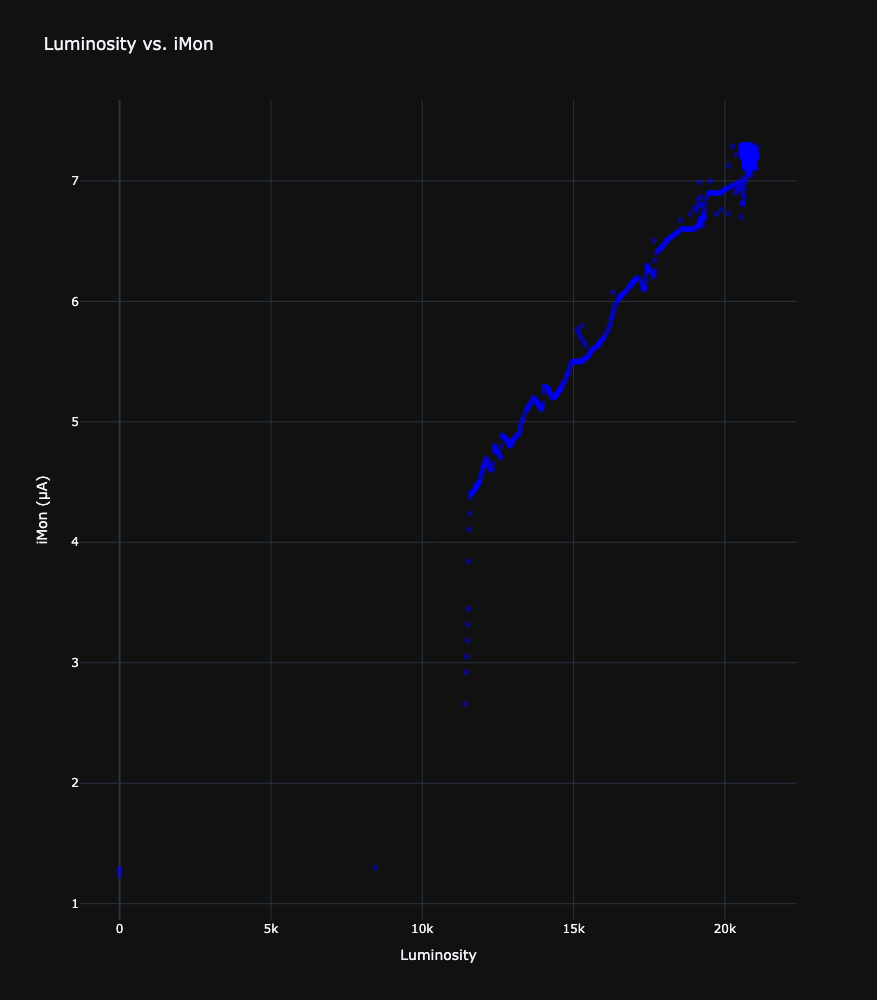

In [23]:
def lumi_plotly(hv_lumi):

    fig = go.Figure()
    
    fig.add_trace(go.Scatter(mode="markers", x = hv_lumi.index, y = hv_lumi.values, marker = dict(color = 'blue', opacity = .45)))
    
    fig.update_layout(
        autosize = False,
        width = 1000,
        height = 1000,
        title = 'Luminosity vs. iMon',
        xaxis_title = 'Luminosity',
        yaxis_title = 'iMon (μA)',
        template = 'plotly_dark'
    )
    
    return fig

fig = lumi_plotly(hv_lumi)

fig.show()

In [24]:
%%time
mdt_hvImon_queryData = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', 'ATLMDTPS2:CAEN/PSMDT02/branchController00/easyCrate0/easyBoard01/channel001.actual.iMon', True, since_ts, till_ts, 0, True)

CPU times: user 2.49 ms, sys: 4.21 ms, total: 6.7 ms
Wall time: 193 ms


In [25]:
md_hvImon_df = queryDataToDataFrame(mdt_hvImon_queryData)

In [26]:
md_hvImon_df.sort_values(by=['ts'], inplace=True)

In [27]:
t = pd.to_datetime(md_hvImon_df['ts'], unit = 'us')
y = md_hvImon_df['value'].astype('float64')

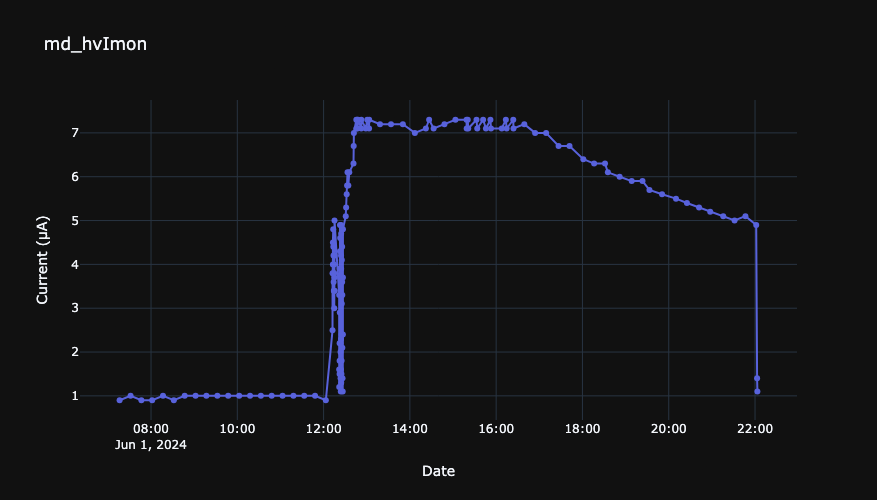

In [28]:
fig = time_plotly([(t, y, 'md_hvImon')], since_dt, till_dt, title = 'md_hvImon', y_title = 'Current (μA)')
fig.show()

In [29]:
%%time
mdt_hvVmon_queryData = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', 'ATLMDTPS2:CAEN/PSMDT02/branchController00/easyCrate0/easyBoard01/channel001.actual.vMon', True, since_ts, till_ts, 0, True)

CPU times: user 2.79 ms, sys: 3.66 ms, total: 6.45 ms
Wall time: 190 ms


In [30]:
md_hvVmon_df = queryDataToDataFrame(mdt_hvVmon_queryData)

In [31]:
md_hvVmon_df.sort_values(by=['ts'], inplace=True)

In [32]:
t = pd.to_datetime(md_hvVmon_df['ts'], unit = 'us')
y = md_hvVmon_df['value'].astype('float64')

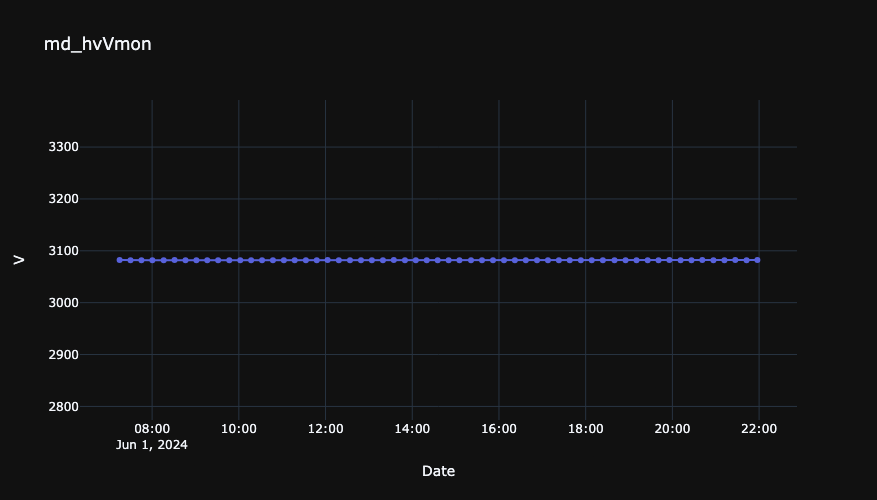

In [33]:
fig = time_plotly([(t, y, 'md_hvVmon')], since_dt, till_dt, 'md_hvVmon', 'V', y_range = True)
fig.show()

In [34]:
ts_start_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_start'].values[0]
ts_end_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_end'].values[0]

ts_start_dt = '2024-07-01 09:13:57'
ts_end_dt = '2024-08-02 00:10:13'

fmt = '%Y-%m-%d %H:%M:%S'

since_dt = dt.strptime(ts_start_dt, fmt)
till_dt = dt.strptime(ts_end_dt, fmt)
print(since_dt)
print(till_dt)
print(till_dt-since_dt)
since_ts = int(since_dt.timestamp()*1e6)
till_ts = int(till_dt.timestamp()*1e6)

ts_start_dt_series = pd.to_datetime(run_num_list['ts_start'], format = fmt)
ts_end_dt_series = pd.to_datetime(run_num_list['ts_end'], format = fmt)


runs_in_timerange = run_num_list[(since_dt <= ts_start_dt_series ) & (till_dt >= ts_end_dt_series)]['run_number'].values
print(runs_in_timerange.shape[0])
runs_in_timerange

2024-07-01 09:13:57
2024-08-02 00:10:13
31 days, 14:56:16
12


array([479345, 479374, 479398, 479404, 479439, 479449, 479483, 479496,
       479507, 479519, 479553, 479563])

In [35]:
pd.set_option('display.max_colwidth', None)

mdt_unplugged_queryData = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*unplugged', True, since_ts, till_ts, 0, True)
mdt_unplugged_df = queryDataToDataFrame(mdt_unplugged_queryData)
mdt_unplugged_df = mdt_unplugged_df[mdt_unplugged_df['value'] != '0.0']
print(mdt_unplugged_df)

                                                                                          datapoint  \
95517  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel000.actual.unplugged   
95632  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel001.actual.unplugged   
95747  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel002.actual.unplugged   
95814  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel003.actual.unplugged   
95816  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel004.actual.unplugged   
95866  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel005.actual.unplugged   
95981  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel006.actual.unplugged   
96096  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel007.actual.unplugged   
96163  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/c

In [36]:
%%time
# mdt_BIS7A_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BI.*A.*.Vcc', True, since_ts, till_ts, 0, True)
mdt_BIS7A12_VCC_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BIS7A12.*.Vcc', True, since_ts, till_ts, 0, True)
md_hvVmon_df.sort_values(by=['ts'], inplace=True)

CPU times: user 8.34 ms, sys: 7.48 ms, total: 15.8 ms
Wall time: 480 ms


In [37]:
# mdt_BIS7A12_VCC = queryDataToDataFrame(mdt_BIS7A12_VCC_df)

In [38]:
# mdt_BIS7A12_VCC.sort_values(by=['ts'], inplace=True)

In [39]:
# mdt_BIS7A12_VCC.head(3)

In [40]:
# t = pd.to_datetime(mdt_BIS7A12_VCC['ts'], unit = 'us')
# y = mdt_BIS7A12_VCC['value'].astype('float64')

In [41]:
# time_plot([(t, y, 'mdt_BIS7A12_VCC')], since_dt, till_dt, 'mdt_BIS7A12_VCC', 'V', True)
# plt.show()

In [42]:
%%time
# mdt_BIS7A_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BI.*A.*.Vcc', True, since_ts, till_ts, 0, True)
mdt_BIL3A01_ntc01_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BIL3A01.*.ntc.ntc01.*', True, since_ts, till_ts, 0, True)
mdt_BIL3A01_ntc02_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BIL3A01.*.ntc.ntc02.*', True, since_ts, till_ts, 0, True)
mdt_BIL3A01_ntc03_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BIL3A01.*.ntc.ntc03.*', True, since_ts, till_ts, 0, True)
mdt_BIL3A01_ntc04_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BIL3A01.*.ntc.ntc04.*', True, since_ts, till_ts, 0, True)
mdt_BIL3A01_ntc05_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BIL3A01.*.ntc.ntc05.*', True, since_ts, till_ts, 0, True)

CPU times: user 20.2 ms, sys: 21.1 ms, total: 41.3 ms
Wall time: 2.43 s


In [43]:
mdt_BIL3A01_ntc01 = queryDataToDataFrame(mdt_BIL3A01_ntc01_df)
mdt_BIL3A01_ntc02 = queryDataToDataFrame(mdt_BIL3A01_ntc02_df)
mdt_BIL3A01_ntc03 = queryDataToDataFrame(mdt_BIL3A01_ntc03_df)
mdt_BIL3A01_ntc04 = queryDataToDataFrame(mdt_BIL3A01_ntc04_df)
mdt_BIL3A01_ntc05 = queryDataToDataFrame(mdt_BIL3A01_ntc05_df)

In [44]:
mdt_BIL3A01_ntc01.sort_values(by=['ts'], inplace=True)
mdt_BIL3A01_ntc02.sort_values(by=['ts'], inplace=True)
mdt_BIL3A01_ntc03.sort_values(by=['ts'], inplace=True)
mdt_BIL3A01_ntc04.sort_values(by=['ts'], inplace=True)
mdt_BIL3A01_ntc05.sort_values(by=['ts'], inplace=True)

In [45]:
mdt_BIL3A01_ntc01.head(3)

datapoint                ts   value
0  ATLMDTMDM1:BIL3A01.ntc.ntc01.value  1719822027560000  23.832
1  ATLMDTMDM1:BIL3A01.ntc.ntc01.value  1719829271088000  23.853
2  ATLMDTMDM1:BIL3A01.ntc.ntc01.value  1719836514875000  23.828

In [46]:
t1 = pd.to_datetime(mdt_BIL3A01_ntc01['ts'], unit = 'us')
y1 = mdt_BIL3A01_ntc01['value'].astype('float64')
l1 = 'ntc01'
t2 = pd.to_datetime(mdt_BIL3A01_ntc02['ts'], unit = 'us')
y2 = mdt_BIL3A01_ntc02['value'].astype('float64')
l2 = 'ntc02'
t3 = pd.to_datetime(mdt_BIL3A01_ntc03['ts'], unit = 'us')
y3 = mdt_BIL3A01_ntc03['value'].astype('float64')
l3 = 'ntc03'
t4 = pd.to_datetime(mdt_BIL3A01_ntc04['ts'], unit = 'us')
y4 = mdt_BIL3A01_ntc04['value'].astype('float64')
l4 = 'ntc04'
t5 = pd.to_datetime(mdt_BIL3A01_ntc05['ts'], unit = 'us')
y5 = mdt_BIL3A01_ntc05['value'].astype('float64')
l5 = 'ntc05'

tsys = [(t1, y1, l1), (t2, y2, l2), (t3, y3, l3), (t4, y4, l4), (t5, y5, l5)]

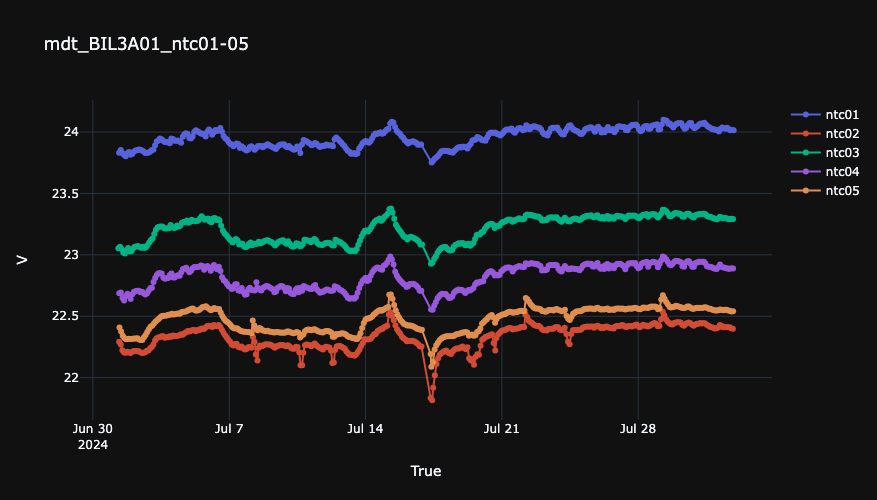

In [47]:
fig = time_plotly(tsys, since_dt, till_dt, 'mdt_BIL3A01_ntc01-05', 'V', True)
fig.show()

In [48]:
# ts_start_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_start'].values[0]
# ts_end_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_end'].values[0]

ts_start_dt = '2024-08-05 13:26:02'
ts_end_dt = '2024-08-26 13:26:02'

fmt = '%Y-%m-%d %H:%M:%S'

since_dt = dt.strptime(ts_start_dt, fmt)
till_dt = dt.strptime(ts_end_dt, fmt)
print(since_dt)
print(till_dt)
print(till_dt-since_dt)
since_ts = int(since_dt.timestamp()*1e6)
till_ts = int(till_dt.timestamp()*1e6)

2024-08-05 13:26:02
2024-08-26 13:26:02
21 days, 0:00:00


In [49]:
mdt_all_fsm_status_queryData = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-string', '.*fsm.currentState', True, since_ts, till_ts, 0, True)
mdt_all_fsm_status_df = queryDataToDataFrame(mdt_all_fsm_status_queryData)
mdt_all_fsm_status_df.sort_values(by=['ts'], inplace=True)
print('All FSM values:\n\n', mdt_all_fsm_status_df['value'].unique())

All FSM values:

 ["'RAMP_UP'" "'RAMPING'" "'ON'" "'READY'" "'REQUEST'" "'PRELOAD'"
 "'RESET'" "'STRINGLOAD'" "'VERIFY'" "'INITIALIZED'" "'RAMP_DOWN'"
 "'STANDBY'" "'NOT_INITIALIZED'" "'OFF'" "'NOT_READY'" "'UNPLUGGED'"
 "'FAILED'"]


In [50]:
mdt_fsm_status_queryData = db.get_data('DCS', 
                                       'ATLAS_PVSSMDT', 
                                       'value-string', 
                                       '.*fsm.currentState', 
                                       True, 
                                       since_ts, 
                                       till_ts, 
                                       0, 
                                       True)

mdt_fsm_status_df = queryDataToDataFrame(mdt_fsm_status_queryData)
mdt_fsm_flags_df  = mdt_fsm_status_df[(mdt_fsm_status_df['value'] != "'OFF'") & 
                                      (mdt_fsm_status_df['value'] != "'ON'") & 
                                      (mdt_fsm_status_df['value'] != "'STANDBY'") & 
                                      (mdt_fsm_status_df['value'] != "'INITIALIZED'") & 
                                      (mdt_fsm_status_df['value'] != "'RAMP_UP'") & 
                                      (mdt_fsm_status_df['value'] != "'RAMPING'") & 
                                      (mdt_fsm_status_df['value'] != "'RAMP_DOWN'") & 
                                      (mdt_fsm_status_df['value'] != "'REQUEST'") & 
                                      (mdt_fsm_status_df['value'] != "'PRELOAD'") & 
                                      (mdt_fsm_status_df['value'] != "'VERIFY'") & 
                                      (mdt_fsm_status_df['value'] != "'RESET'") & 
                                      (mdt_fsm_status_df['value'] != "'STRINGLOAD'") & 
                                      (mdt_fsm_status_df['value'] != "'READY'")
]

mdt_fsm_flags_df.sort_values(by=['ts'], inplace=True)
mdt_fsm_flags_df['ts'] = pd.to_datetime(mdt_fsm_flags_df['ts'], unit = 'us')

/tmp/ipykernel_777/2685394046.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_777/2685394046.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
mdt_fsm_flags_df

datapoint  \
1838    ATLMDTMDM1:MDT_BC_JTAG_INNER|BIR5C11.fsm.currentState   
1784    ATLMDTMDM1:MDT_BC_JTAG_INNER|BIR4C11.fsm.currentState   
16771            ATLMDTPS2:MDTPS_BC|MDTPS_BC.fsm.currentState   
1840    ATLMDTMDM1:MDT_BC_JTAG_INNER|BIR5C11.fsm.currentState   
1786    ATLMDTMDM1:MDT_BC_JTAG_INNER|BIR4C11.fsm.currentState   
...                                                       ...   
3735   ATLMDTMDM2:MDT_BC_JTAG_MIDDLE|BML4C15.fsm.currentState   
3537   ATLMDTMDM2:MDT_BC_JTAG_MIDDLE|BML1C15.fsm.currentState   
3737   ATLMDTMDM2:MDT_BC_JTAG_MIDDLE|BML4C15.fsm.currentState   
3539   ATLMDTMDM2:MDT_BC_JTAG_MIDDLE|BML1C15.fsm.currentState   
16790            ATLMDTPS2:MDTPS_BC|MDTPS_BC.fsm.currentState   

                           ts              value  
1838  2024-08-06 07:03:17.348  'NOT_INITIALIZED'  
1784  2024-08-06 07:03:17.348  'NOT_INITIALIZED'  
16771 2024-08-06 07:03:20.113        'NOT_READY'  
1840  2024-08-06 07:03:24.276  'NOT_INITIALIZED'  
1786  2024-08-06 07:03:24.277  'NOT_INITIALIZED'  
...                       ...                ...  
3735  2024-08-06 16:24:01.340  'NOT_INITIALIZED'  
3537  2024-08-06 16:24:01.340  'NOT_INITIALIZED'  
3737  2024-08-06 16:24:08.764  'NOT_INITIALIZED'  
3539  2024-08-06 16:24:08.766  'NOT_INITIALIZED'  
16790 2024-08-06 16:35:08.340        'NOT_READY'  

[839 rows x 3 columns]

In [52]:
def generate_lbn_sb_r4p_df(since_dt, till_dt):
    
    lbn_df = beauty.timeseries(since_dt, 
                            till_dt, 
                            'DCS', 
                            'ATLAS_PVSSDCS', 
                            'value-number', 
                            'ATLGCSDDC:daqLumiBlockNumber.value', 
                            None, 
                            False)[0]
    sb_df = beauty.timeseries(since_dt, 
                               till_dt, 
                               'DCS', 
                               'ATLAS_PVSSDCS', 
                               'value-number', 
                               'ATLGCSLHC:bit_lhc_RunCtrl_SafeBeam_StableBeams.value', 
                               None, 
                               False)[0]
    r4p_df = beauty.timeseries(since_dt, 
                                till_dt, 
                                'DCS', 
                                'ATLAS_PVSSDCS', 
                                'value-number', 
                                'ATLGCSLHC:ATLAS.Ready4Physics', 
                                None, 
                                False)[0]
    
    lbn_df = pd.DataFrame({'value': lbn_df.array, 'dt': lbn_df.index.tz_localize(None) + timedelta(hours = 2)})
    sb_df = pd.DataFrame({'value': sb_df.array , 'dt': sb_df.index.tz_localize(None) + timedelta(hours = 2)})
    r4p_df = pd.DataFrame({'value': r4p_df.array , 'dt': r4p_df.index.tz_localize(None) + timedelta(hours = 2)})
    
    lbns = []
    lbn_tss = []
    sbs = []
    sb_tss = []
    r4ps = []
    r4p_tss= []
    
    sb = sb_df.iloc[0]['value']
    r4p = r4p_df.iloc[0]['value']
    
    lbn_prev = lbn_df.iloc[0]['value']
    
    i = 0
    j = 0
    k = 0
    
    sb_ts = int(dt.timestamp(sb_df.iloc[j]['dt'])*int(1e6))
    r4p_ts = int(dt.timestamp(r4p_df.iloc[k]['dt'])*int(1e6))
    
    lbn_ts = int(dt.timestamp(lbn_df.iloc[i]['dt'])*int(1e6))
    lbn_ts_prev = int(dt.timestamp(lbn_df.iloc[i]['dt'])*int(1e6))
    
    if sb_ts > lbn_ts:
    
        if sb == 1.0:
    
            sb = 0.0
    
        else:
    
            sb = 1.0
    
    if r4p_ts > lbn_ts:
    
        if r4p == 1.0:
    
            r4p = 0.0
    
        else:
    
            r4p = 1.0
    
    for i in range(lbn_df.shape[0]):
    
        lbn_ts = int(dt.timestamp(lbn_df.iloc[i]['dt'])*int(1e6))
        
        if lbn_ts > sb_ts:
    
            sb = sb_df.iloc[j]['value']
    
            if j < sb_df.shape[0] - 1:
            
                j += 1
                sb_ts = int(dt.timestamp(sb_df.iloc[j]['dt'])*int(1e6))
    
        if lbn_ts > r4p_ts:
    
            r4p = r4p_df.iloc[k]['value']
    
            if k < r4p_df.shape[0] - 1:
            
                k += 1
                r4p_ts = int(dt.timestamp(r4p_df.iloc[k]['dt'])*int(1e6))
    
        lbns.append(lbn_df.iloc[i-1]['value'])
        sbs.append(sb)
        r4ps.append(r4p)
        lbn_tss.append(lbn_ts_prev)
        sb_tss.append(sb_ts)
        r4p_tss.append(r4p_ts)
        
        lbn_ts_prev = lbn_ts
    
    dic_tmp = {'LumiBlock Number': lbns, 
               'StableBeam': sbs, 
               'Ready4Physics': r4ps, 
               'LumiBlock ts': lbn_tss, 
               'StableBeam ts': sb_tss, 
               'Ready4Physics ts': r4p_tss}
    
    lbn_sb_r4p_df = pd.DataFrame(dic_tmp)
    lbn_sb_r4p_df['LumiBlock dt'] = pd.to_datetime(lbn_sb_r4p_df['LumiBlock ts'], unit = 'us')
    lbn_sb_r4p_df.drop(columns = ['StableBeam ts', 'Ready4Physics ts'], inplace = True)

    return lbn_sb_r4p_df

In [53]:
lbn_sb_r4p_df = generate_lbn_sb_r4p_df(dt.fromtimestamp(since_ts/1e6), 
                                       dt.fromtimestamp(till_ts/1e6))

In [54]:
lbn_sb_r4p_df

LumiBlock Number  StableBeam  Ready4Physics      LumiBlock ts  \
0                  69.0         0.0            0.0  1722852371187000   
1                1168.0         0.0            0.0  1722852371187000   
2                1168.0         0.0            0.0  1722886571584001   
3                   0.0         0.0            0.0  1722887237011000   
4                   1.0         0.0            0.0  1722887299219000   
...                 ...         ...            ...               ...   
27730              64.0         0.0            0.0  1724678520729000   
27731              65.0         0.0            0.0  1724678580735000   
27732              66.0         0.0            0.0  1724678640741000   
27733              67.0         0.0            0.0  1724678700850000   
27734              68.0         0.0            0.0  1724678760860000   

                    LumiBlock dt  
0     2024-08-05 10:06:11.187000  
1     2024-08-05 10:06:11.187000  
2     2024-08-05 19:36:11.584001  
3     2024-08-05 19:47:17.011000  
4     2024-08-05 19:48:19.219000  
...                          ...  
27730 2024-08-26 13:22:00.729000  
27731 2024-08-26 13:23:00.735000  
27732 2024-08-26 13:24:00.741000  
27733 2024-08-26 13:25:00.850000  
27734 2024-08-26 13:26:00.860000  

[27735 rows x 5 columns]

In [55]:
rn_df = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSDDC:daqRunNumber.value',None, False)[0]
rn_df = pd.DataFrame({'value': rn_df.array , 'dt': rn_df.index.tz_localize(None) + timedelta(hours = 2)})
rn_df['value'] = rn_df['value'].astype(float).astype(int)
rn_df['ts'] = rn_df.dt.values.astype(int) // 10**3
rn_df

value                         dt                ts
0    481638 2024-08-04 20:31:50.341000  1722803510341000
1    481638 2024-08-05 21:36:11.521001  1722893771521001
2    481749 2024-08-05 21:47:16.996000  1722894436996000
3    481749 2024-08-06 12:54:39.032001  1722948879032001
4    481786 2024-08-06 13:01:29.037000  1722949289037000
..      ...                        ...               ...
145  483409 2024-08-25 16:22:37.120001  1724602957120001
146  483440 2024-08-25 16:28:01.462000  1724603281462000
147  483440 2024-08-26 14:36:54.118001  1724683014118001
148  483514 2024-08-26 14:42:11.117000  1724683331117000
149  483514 2024-08-26 17:27:46.970001  1724693266970001

[150 rows x 3 columns]

In [56]:
s_e = []

for k in range(rn_df.shape[0] - 1):

    if rn_df.iloc[k]['value'] == rn_df.iloc[k+1]['value']:

        s_e.append('Start')

    else:

        s_e.append('End')

if s_e[-1] == 'Start':

    s_e.append('End')

else:

    s_e.append('Start')

rn_df['Start/End'] = pd.Series(s_e)

rn_df

value                         dt                ts Start/End
0    481638 2024-08-04 20:31:50.341000  1722803510341000     Start
1    481638 2024-08-05 21:36:11.521001  1722893771521001       End
2    481749 2024-08-05 21:47:16.996000  1722894436996000     Start
3    481749 2024-08-06 12:54:39.032001  1722948879032001       End
4    481786 2024-08-06 13:01:29.037000  1722949289037000       End
..      ...                        ...               ...       ...
145  483409 2024-08-25 16:22:37.120001  1724602957120001       End
146  483440 2024-08-25 16:28:01.462000  1724603281462000     Start
147  483440 2024-08-26 14:36:54.118001  1724683014118001       End
148  483514 2024-08-26 14:42:11.117000  1724683331117000     Start
149  483514 2024-08-26 17:27:46.970001  1724693266970001       End

[150 rows x 4 columns]

In [57]:
lbns = []
fsms = []
fsm_flags = []
fsm_tss = []
lbn_tss = []
sbs = []
r4ps = []
rns = []

i = 0
k = 0

fsm_ts = dt.timestamp(mdt_fsm_flags_df.iloc[i]['ts'])*int(1e6)

for j in range(lbn_sb_r4p_df.shape[0]):

    lbn_ts = lbn_sb_r4p_df.iloc[j]['LumiBlock ts']
    
    if lbn_ts > fsm_ts:

        while k >= 0:

            rn_ts = rn_df.iloc[k]['ts']

            if lbn_ts < rn_ts:

                k += 1

            else:

                rns.append(rn_df.iloc[k]['value'])
                
                break
                
        lbns.append(lbn_sb_r4p_df.iloc[j-1]['LumiBlock Number'])
        fsms.append(mdt_fsm_flags_df.iloc[i]['datapoint'][6:-17])
        fsm_flags.append(mdt_fsm_flags_df.iloc[i]['value'])
        sbs.append(lbn_sb_r4p_df.iloc[j]['StableBeam'])
        r4ps.append(lbn_sb_r4p_df.iloc[j]['Ready4Physics'])
        fsm_tss.append(fsm_ts)
        lbn_tss.append(lbn_sb_r4p_df.iloc[j-1]['LumiBlock ts'])

        i += 1
        
        if i == mdt_fsm_flags_df.shape[0]:
            
            break
        
        fsm_ts = dt.timestamp(mdt_fsm_flags_df.iloc[i]['ts'])*int(1e6)

    j += 1

            
dic_tmp = {'LumiBlock Number': lbns, 
           'FSM Datapoint': fsms, 
           'FSM Flag': fsm_flags, 
           'Stable Beam': sbs, 
           'Ready 4 Physics': r4ps, 
           'Run Number': rns,
           'LumiBlock ts': lbn_tss, 
           'FSM ts': fsm_tss}

lbn_fsm_flags_df = pd.DataFrame(dic_tmp)
lbn_fsm_flags_df['LumiBlock dt'] = pd.to_datetime(lbn_fsm_flags_df['LumiBlock ts'], unit = 'us')
lbn_fsm_flags_df['FSM dt'] = pd.to_datetime(lbn_fsm_flags_df['FSM ts'], unit = 'us')
lbn_fsm_flags_df.drop(columns = ['LumiBlock ts', 'FSM ts'], inplace = True)

In [58]:
lbn_fsm_flags_df

LumiBlock Number                    FSM Datapoint           FSM Flag  \
0               696.0   MDM1:MDT_BC_JTAG_INNER|BIR5C11  'NOT_INITIALIZED'   
1               697.0   MDM1:MDT_BC_JTAG_INNER|BIR4C11  'NOT_INITIALIZED'   
2               698.0            PS2:MDTPS_BC|MDTPS_BC        'NOT_READY'   
3               699.0   MDM1:MDT_BC_JTAG_INNER|BIR5C11  'NOT_INITIALIZED'   
4               700.0   MDM1:MDT_BC_JTAG_INNER|BIR4C11  'NOT_INITIALIZED'   
..                ...                              ...                ...   
834             788.0  MDM2:MDT_BC_JTAG_MIDDLE|BML4C15  'NOT_INITIALIZED'   
835             789.0  MDM2:MDT_BC_JTAG_MIDDLE|BML1C15  'NOT_INITIALIZED'   
836             790.0  MDM2:MDT_BC_JTAG_MIDDLE|BML4C15  'NOT_INITIALIZED'   
837             791.0  MDM2:MDT_BC_JTAG_MIDDLE|BML1C15  'NOT_INITIALIZED'   
838             792.0            PS2:MDTPS_BC|MDTPS_BC        'NOT_READY'   

     Stable Beam  Ready 4 Physics  Run Number            LumiBlock dt  \
0            1.0              1.0      481638 2024-08-06 05:02:36.681   
1            1.0              1.0      481638 2024-08-06 05:03:36.680   
2            1.0              1.0      481638 2024-08-06 05:04:36.782   
3            1.0              1.0      481638 2024-08-06 05:05:36.791   
4            1.0              1.0      481638 2024-08-06 05:06:36.896   
..           ...              ...         ...                     ...   
834          1.0              1.0      481638 2024-08-07 07:43:23.823   
835          1.0              1.0      481638 2024-08-07 07:44:23.922   
836          1.0              1.0      481638 2024-08-07 07:45:23.929   
837          1.0              1.0      481638 2024-08-07 07:45:34.247   
838          1.0              1.0      481638 2024-08-07 07:46:34.253   

                           FSM dt  
0   2024-08-06 05:03:17.348000000  
1   2024-08-06 05:03:17.348000000  
2   2024-08-06 05:03:20.112999936  
3   2024-08-06 05:03:24.276000000  
4   2024-08-06 05:03:24.276999936  
..                            ...  
834 2024-08-06 14:24:01.340000000  
835 2024-08-06 14:24:01.340000000  
836 2024-08-06 14:24:08.764000000  
837 2024-08-06 14:24:08.766000128  
838 2024-08-06 14:35:08.340000000  

[839 rows x 8 columns]

In [59]:
def query_data(query, source = 'MDT', type = 'string'):
    queryData = db.get_data('DCS', f'ATLAS_PVSS{source}', f'value-{type}', f'.*{query}.*', True, since_ts, till_ts, 0, True)
    df = queryDataToDataFrame(queryData)
    df.sort_values(by=['ts'], inplace=True)
    df['ts'] = pd.to_datetime(df['ts'], unit = 'us')
    
    return df

In [60]:
LVO_df = query_data('v0', type = 'number')

In [61]:
LVO_df[LVO_df['value'] != '0.0'].head(50)

datapoint  \
1    ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard01/channel000.readBackSettings.v0   
5    ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard01/channel002.readBackSettings.v0   
7    ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard01/channel003.readBackSettings.v0   
21   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard09/channel002.readBackSettings.v0   
9    ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard05/channel000.readBackSettings.v0   
19   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard09/channel001.readBackSettings.v0   
3    ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard01/channel001.readBackSettings.v0   
11   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard05/channel001.readBackSettings.v0   
13   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard05/channel002.readBackSettings.v0   
15   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard05/channel003.readBackSettings.v0   
17   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard09/channel000.readBackSettings.v0   
37   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard17/channel002.readBackSettings.v0   
23   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard09/channel003.readBackSettings.v0   
69   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard03/channel002.readBackSettings.v0   
67   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard03/channel001.readBackSettings.v0   
65   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard03/channel000.readBackSettings.v0   
71   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard03/channel003.readBackSettings.v0   
27   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard13/channel001.readBackSettings.v0   
29   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard13/channel002.readBackSettings.v0   
31   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard13/channel003.readBackSettings.v0   
39   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard17/channel003.readBackSettings.v0   
33   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard17/channel000.readBackSettings.v0   
35   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard17/channel001.readBackSettings.v0   
25   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate2/easyBoard13/channel000.readBackSettings.v0   
85   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard03/channel010.readBackSettings.v0   
83   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard03/channel009.readBackSettings.v0   
81   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard03/channel008.readBackSettings.v0   
77   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard03/channel006.readBackSettings.v0   
87   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard03/channel011.readBackSettings.v0   
75   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard03/channel005.readBackSettings.v0   
73   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard03/channel004.readBackSettings.v0   
91   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard05/channel001.readBackSettings.v0   
79   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard03/channel007.readBackSettings.v0   
89   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard05/channel000.readBackSettings.v0   
97   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard05/channel004.readBackSettings.v0   
95   ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard05/channel003.readBackSettings.v0   
101  ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard05/channel006.readBackSettings.v0   
103  ATLMDTPS2:CAEN/PSMDT02/branchController02/easyCrate3/easyBoard05/channel007.readBackSettings.v0   
113  ATLMDTPS2:CAEN/PSMDT02/branchC